In [1]:
import astropy
import numpy as np
import pandas as pd

## Section1 : Importing Cosmology Libraries for comoving distance and lookback time

In [3]:
from astropy.cosmology import FlatLambdaCDM
om = 0.3089
h = 0.6774
cosmo = FlatLambdaCDM(H0=100*h, Om0=om)
redshift = {"Z=0":[0],"Z=0.022":[0.022],'Z=0.045':[0.045],'Z=0.093':[0.093],'Z=0.14':[0.14],'Z=0.19':[0.19],'Z=0.25':[0.25],'Z=0.30':[0.30],'Z=0.36':[0.36],'Z=0.43':[0.43],'Z=0.49':[0.49],'Z=0.56':[0.56],'Z=0.63':[0.63],'Z=0.70':[0.70],'Z=0.78':[0.78],'Z=0.86':[0.86],'Z=0.94':[0.94],'Z=1.03':[1.03],'Z=1.12':[1.12],'Z=1.22':[1.22],'Z=1.32':[1.32],'Z=1.43':[1.43],'Z=1.54':[1.54],'Z=1.65':[1.65],'Z=1.77':[1.77],'Z=1.90':[1.90],'Z=2.03':[2.03],'Z=2.16':[2.16],'Z=2.30':[2.30],'Z=2.46':[2.46],'Z=2.61':[2.61],'Z=2.78':[2.78],'Z=2.95':[2.95],'Z=3.13':[3.13],'Z=3.31':[3.31],'Z=3.61':[3.61],'Z=3.93':[3.93],'Z=4.27':[4.27],'Z=4.63':[4.63],'Z=5.16':[5.16],'Z=5.73':[5.73],'Z=6.34':[6.34],'Z=7.02':[7.02],'Z=7.76':[7.76],'Z=8.58':[8.58],'Z=9.47':[9.47],'Z=10.44':[10.44]}
for i, label in enumerate(redshift.keys()):
    redshift[label].append(h*cosmo.comoving_distance(redshift[label][0]).value)
comov_dist = np.zeros([47])
redshift_array = np.zeros([47])
for i,snapshot in enumerate(redshift):
    comov_dist[i] = h*cosmo.comoving_distance(redshift[snapshot][0]).value
    redshift_array[i] = redshift[snapshot][0]

comov_dist_mid = np.pad((comov_dist[1:]+comov_dist[0:-1])/2,(1,1))
comov_dist_mid[-1] = comov_dist[-1]



In [4]:
redshift

{'Z=0': [0, 0.0],
 'Z=0.022': [0.022, 65.61672001782956],
 'Z=0.045': [0.045, 133.48802520698888],
 'Z=0.093': [0.093, 272.69972020143257],
 'Z=0.14': [0.14, 405.77751175401926],
 'Z=0.19': [0.19, 543.7952022866602],
 'Z=0.25': [0.25, 704.5513437630285],
 'Z=0.30': [0.3, 834.4630077446016],
 'Z=0.36': [0.36, 985.5296614116049],
 'Z=0.43': [0.43, 1155.212145720986],
 'Z=0.49': [0.49, 1295.1469458994227],
 'Z=0.56': [0.56, 1452.1568595633755],
 'Z=0.63': [0.63, 1602.6586943697912],
 'Z=0.70': [0.7, 1746.9038360829359],
 'Z=0.78': [0.78, 1904.4340420698536],
 'Z=0.86': [0.86, 2054.5430284628446],
 'Z=0.94': [0.94, 2197.636573089935],
 'Z=1.03': [1.03, 2350.7275691818018],
 'Z=1.12': [1.12, 2495.993731651714],
 'Z=1.22': [1.22, 2648.8591659397134],
 'Z=1.32': [1.32, 2793.3853601200112],
 'Z=1.43': [1.43, 2943.4799580970093],
 'Z=1.54': [1.54, 3085.0106964206025],
 'Z=1.65': [1.65, 3218.677672341165],
 'Z=1.77': [1.77, 3356.273085641709],
 'Z=1.90': [1.9, 3496.4885590655795],
 'Z=2.03': [2.

In [13]:
comov_dist,redshift_array,cosmo.comoving_distance(0.103).value*h

(array([   0.        ,   65.61672002,  133.48802521,  272.6997202 ,
         405.77751175,  543.79520229,  704.55134376,  834.46300774,
         985.52966141, 1155.21214572, 1295.1469459 , 1452.15685956,
        1602.65869437, 1746.90383608, 1904.43404207, 2054.54302846,
        2197.63657309, 2350.72756918, 2495.99373165, 2648.85916594,
        2793.38536012, 2943.4799581 , 3085.01069642, 3218.67767234,
        3356.27308564, 3496.48855907, 3628.3263144 , 3752.53827225,
        3878.54209819, 4013.61116352, 4132.4057522 , 4258.77555645,
        4377.21565703, 4494.83786535, 4605.23531249, 4775.02403547,
        4939.13659458, 5097.14907832, 5248.82753679, 5447.72797603,
        5635.0824257 , 5811.05949094, 5983.1805993 , 6147.31600302,
        6306.56664631, 6457.82714414, 6602.18009761]),
 array([ 0.   ,  0.022,  0.045,  0.093,  0.14 ,  0.19 ,  0.25 ,  0.3  ,
         0.36 ,  0.43 ,  0.49 ,  0.56 ,  0.63 ,  0.7  ,  0.78 ,  0.86 ,
         0.94 ,  1.03 ,  1.12 ,  1.22 ,  1.32 ,  1.43

## Section 2: Approximate buffer region estimate

In [5]:
lookback_time = np.zeros([47])
for i,snapshot in enumerate(redshift):
    lookback_time[i] = cosmo.lookback_time(redshift[snapshot][0]).value
delta_t = lookback_time[1:]-lookback_time[:-1]
oneGigaYear_to_sec = 3.15e16  ## seconds
km_to_Mpc = 3.24078e-20 
rough_estimate_of_how_much_haloes_move_in_Mpc = (delta_t)*oneGigaYear_to_sec*350*km_to_Mpc  ### 300 km/s approximate the average velocity dispersion of the local universe
print (delta_t,rough_estimate_of_how_much_haloes_move_in_Mpc.max())

[0.31251388 0.31621554 0.62717731 0.57402205 0.5705551  0.63465076
 0.49069819 0.54705116 0.58588121 0.46160237 0.49588882 0.4544634
 0.41724991 0.43606612 0.39724865 0.36273033 0.37147622 0.33719166
 0.33931394 0.30666209 0.30441047 0.27432718 0.24809555 0.24455809
 0.23823395 0.21417141 0.19330201 0.18789947 0.19249347 0.16186247
 0.16473893 0.14760502 0.14023769 0.12600537 0.18346711 0.16580843
 0.1493139  0.13412195 0.16272714 0.14019311 0.12062879 0.10808403
 0.0943461  0.08375593 0.07276704 0.06354821] 0.2267581743590033


## Section 3: Generating points inside the 4 boxes, compute coordinates and angles

In [6]:
def generate_grid_points_in_volume(xmin, xmax, ymin, ymax, zmin, zmax):
    x = np.linspace(xmin, xmax,400)
    y = np.linspace(ymin, ymax,400)
    z = np.linspace(zmin, zmax,400)
    xx,yy,zz = np.meshgrid(x,y,z)
    flattened_grid = np.column_stack([xx.flatten(), yy.flatten(),zz.flatten()])
    return flattened_grid.T

In [7]:
points1 = generate_grid_points_in_volume(0, 2000, 0, 2000, 0, 2000)+0.1
points2 = generate_grid_points_in_volume(2000, 4000, 0, 2000, 0, 2000)+0.1
points3 = generate_grid_points_in_volume(2000, 4000, 2000, 4000, 0, 2000)+0.1
points4 = generate_grid_points_in_volume(4000, 8000, 2000, 4000, 0, 2000)+0.1

In [13]:
points_r1 = np.sqrt(points1[0]**2+points1[1]**2+points1[2]**2) 
points_r2 = np.sqrt(points2[0]**2+points2[1]**2+points2[2]**2) 
points_r3 = np.sqrt(points3[0]**2+points3[1]**2+points3[2]**2) 
points_r4 = np.sqrt(points4[0]**2+points4[1]**2+points4[2]**2) 

In [14]:
ra = np.radians(31) 
piby2_minus_dec  = np.radians(80)  ## 80 is the theta in spherical coordinates
direction_vector=[np.cos(ra)*np.sin(piby2_minus_dec),np.sin(ra)*np.sin(piby2_minus_dec),np.cos(piby2_minus_dec)]

In [15]:
print (direction_vector)

[0.8441450033599869, 0.5072134892679037, 0.17364817766693041]


In [16]:
### loop over redshifts and ask at each redshift, the gridpoints falling between the two comoving distances, and within theta from the direction vector
cosangle1 = np.dot(points1.T,direction_vector)/points_r1
cosangle2 = np.dot(points2.T,direction_vector)/points_r2
cosangle3 = np.dot(points3.T,direction_vector)/points_r3
cosangle4 = np.dot(points4.T,direction_vector)/points_r4

## Section4: Dataframe with info regarding comoving distance,boxes replicated,etc

In [56]:
columns = ['comovD_Min(Mpchinv)', 'comovD_Max(Mpchinv)','theta(radians)','buffer_comovD(Mpchinv)','buffer_theta(radians)','direction_vector_x','direction_vector_y','direction_vector_z','Kind_of_join', 'halodir1','halodir2','field1','field2','Box1(w/ buffer)','Box2(w/ buffer)','Box3(w/ buffer)','Box4(w/ buffer)']
df = pd.DataFrame(0,columns=columns,index=np.arange(46*2))

In [51]:
buffer_comovD = 1   ## Mpc h^{-1} assuming haloes don't go farther than this between snapshots, obtained from the rough estimate in Section 1

In [58]:
## compute theta_max given a square_coverage_area
A = 50  ## A is the area coverage in square degrees
cos_theta_max =  1-(A/2)*np.pi/180**2 ## theta is the angle made with the cone
theta = np.arccos(cos_theta_max)## in radians
print (theta)   ## in radians

0.06964263622787888


In [59]:
df['Kind_of_join'] = 'left'
df['theta(radians)'] = theta
df['buffer_comovD(Mpchinv)'] = buffer_comovD
df['direction_vector_x'] = 0.844145
df['direction_vector_y'] =0.507213
df['direction_vector_z'] = 0.173648
for i in range(46):
    df.at[2*i,'comovD_Min(Mpchinv)'] = comov_dist[i]
    df.at[2*i,'comovD_Max(Mpchinv)'] = comov_dist_mid[i+1]
    df.at[2*i,'halodir1'] = 50-i
    df.at[2*i,'halodir2'] = 50-i-1
    df.at[2*i,'field1'] = 'last_mainleaf_depthfirst_id'
    df.at[2*i,'field2'] = 'last_mainleaf_depthfirst_id'
    buffer_theta = 1/(comov_dist_mid[i]+5)
    df.at[2*i,'buffer_theta(radians)'] = buffer_theta
    df.at[2*i,'Box1(w/ buffer)'] = ( ((cosangle1>np.cos(theta+buffer_theta))&(points_r1>comov_dist[i]-buffer_comovD)&(points_r1<comov_dist_mid[i+1]+buffer_comovD)).any())
    df.at[2*i,'Box2(w/ buffer)'] = ( ((cosangle2>np.cos(theta+buffer_theta))&(points_r2>comov_dist[i]-buffer_comovD)&(points_r2<comov_dist_mid[i+1]+buffer_comovD)).any())
    df.at[2*i,'Box3(w/ buffer)'] = ( ((cosangle3>np.cos(theta+buffer_theta))&(points_r3>comov_dist[i]-buffer_comovD)&(points_r3<comov_dist_mid[i+1]+buffer_comovD)).any())
    df.at[2*i,'Box4(w/ buffer)'] = ( ((cosangle4>np.cos(theta+buffer_theta))&(points_r4>comov_dist[i]-buffer_comovD)&(points_r4<comov_dist_mid[i+1]+buffer_comovD)).any())
    
    df.at[2*i + 1, 'comovD_Min(Mpchinv)'] = comov_dist_mid[i+1]
    df.at[2*i + 1, 'comovD_Max(Mpchinv)'] = comov_dist[i+1]
    df.at[2*i + 1, 'halodir1'] = 50-i-1
    df.at[2*i + 1, 'halodir2'] =50-i
    df.at[2*i + 1, 'field1'] = 'desc_id'
    df.at[2*i + 1, 'field2'] = 'id'
    buffer_theta = 1/(comov_dist_mid[i+1]+5)
    df.at[2*i + 1,'buffer_theta(radians)'] = buffer_theta
    df.at[2*i + 1, 'Box1(w/ buffer)'] = ( ((cosangle1>np.cos(theta+buffer_theta))&(points_r1>comov_dist_mid[i+1]-buffer_comovD)&(points_r1<comov_dist[i+1]+buffer_comovD)).any())
    df.at[2*i + 1, 'Box2(w/ buffer)'] = ( ((cosangle2>np.cos(theta+buffer_theta))&(points_r2>comov_dist_mid[i+1]-buffer_comovD)&(points_r2<comov_dist[i+1]+buffer_comovD)).any())
    df.at[2*i + 1, 'Box3(w/ buffer)'] = ( ((cosangle3>np.cos(theta+buffer_theta))&(points_r3>comov_dist_mid[i+1]-buffer_comovD)&(points_r3<comov_dist[i+1]+buffer_comovD)).any())
    df.at[2*i + 1, 'Box4(w/ buffer)'] = ( ((cosangle4>np.cos(theta+buffer_theta))&(points_r4>comov_dist_mid[i+1]-buffer_comovD)&(points_r4<comov_dist[i+1]+buffer_comovD)).any())

In [60]:
df.to_pickle('join_table.pkl')

In [61]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,comovD_Min(Mpchinv),comovD_Max(Mpchinv),theta(radians),buffer_comovD(Mpchinv),buffer_theta(radians),direction_vector_x,direction_vector_y,direction_vector_z,Kind_of_join,halodir1,halodir2,field1,field2,Box1(w/ buffer),Box2(w/ buffer),Box3(w/ buffer),Box4(w/ buffer)
0,0.000000,32.808360,0.069643,1,0.200000,0.844145,0.507213,0.173648,left,50,49,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
1,32.808360,65.616720,0.069643,1,0.026449,0.844145,0.507213,0.173648,left,49,50,desc_id,id,True,False,False,False
2,65.616720,99.552373,0.069643,1,0.026449,0.844145,0.507213,0.173648,left,49,48,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
3,99.552373,133.488025,0.069643,1,0.009565,0.844145,0.507213,0.173648,left,48,49,desc_id,id,True,False,False,False
4,133.488025,203.093873,0.069643,1,0.009565,0.844145,0.507213,0.173648,left,48,47,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
5,203.093873,272.699720,0.069643,1,0.004806,0.844145,0.507213,0.173648,left,47,48,desc_id,id,True,False,False,False
6,272.699720,339.238616,0.069643,1,0.004806,0.844145,0.507213,0.173648,left,47,46,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
7,339.238616,405.777512,0.069643,1,0.002905,0.844145,0.507213,0.173648,left,46,47,desc_id,id,True,False,False,False
8,405.777512,474.786357,0.069643,1,0.002905,0.844145,0.507213,0.173648,left,46,45,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
9,474.786357,543.795202,0.069643,1,0.002084,0.844145,0.507213,0.173648,left,45,46,desc_id,id,True,False,False,False


In [41]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,comovD_Min(Mpchinv),comovD_Max(Mpchinv),theta(radians),buffer_comovD(Mpchinv),buffer_theta(radians),Kind_of_join,halodir1,halodir2,field1,field2,"Box1(0,0,0)(w/ buffer)","Box2(L,0,0)(w/ buffer)","Box3(L,L,0)(w/ buffer)","Box4(2L,L,0)(w/ buffer)"
0,0.000000,32.808360,0.069643,1,0.030480,left,50,49,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
1,32.808360,65.616720,0.069643,1,0.015240,left,49,50,desc_id,id,True,False,False,False
2,65.616720,99.552373,0.069643,1,0.010045,left,49,48,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
3,99.552373,133.488025,0.069643,1,0.007491,left,48,49,desc_id,id,True,False,False,False
4,133.488025,203.093873,0.069643,1,0.004924,left,48,47,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
5,203.093873,272.699720,0.069643,1,0.003667,left,47,48,desc_id,id,True,False,False,False
6,272.699720,339.238616,0.069643,1,0.002948,left,47,46,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
7,339.238616,405.777512,0.069643,1,0.002464,left,46,47,desc_id,id,True,False,False,False
8,405.777512,474.786357,0.069643,1,0.002106,left,46,45,last_mainleaf_depthfirst_id,last_mainleaf_depthfirst_id,True,False,False,False
9,474.786357,543.795202,0.069643,1,0.001839,left,45,46,desc_id,id,True,False,False,False


## Table for downloading data from Cosmohub

In [85]:
columns = ['comovD_Min(Mpchinv)', 'comovD_Max(Mpchinv)','theta(radians)','buffer_comovD(Mpchinv)','buffer_theta(radians)','direction_vector_x','direction_vector_y','direction_vector_z','halodir','Box1(0,0,0)(w/ buffer)','Box2(L,0,0)(w/ buffer)','Box3(L,L,0)(w/ buffer)','Box4(2L,L,0)(w/ buffer)']
df = pd.DataFrame(0,columns=columns,index=np.arange(47))

In [86]:
comov_dist_padded = np.pad(comov_dist,(1,1))
comov_dist_padded[-1] =comov_dist_padded[-2] 

In [87]:
comov_dist_padded

array([   0.        ,    0.        ,   65.61672002,  133.48802521,
        272.6997202 ,  405.77751175,  543.79520229,  704.55134376,
        834.46300774,  985.52966141, 1155.21214572, 1295.1469459 ,
       1452.15685956, 1602.65869437, 1746.90383608, 1904.43404207,
       2054.54302846, 2197.63657309, 2350.72756918, 2495.99373165,
       2648.85916594, 2793.38536012, 2943.4799581 , 3085.01069642,
       3218.67767234, 3356.27308564, 3496.48855907, 3628.3263144 ,
       3752.53827225, 3878.54209819, 4013.61116352, 4132.4057522 ,
       4258.77555645, 4377.21565703, 4494.83786535, 4605.23531249,
       4775.02403547, 4939.13659458, 5097.14907832, 5248.82753679,
       5447.72797603, 5635.0824257 , 5811.05949094, 5983.1805993 ,
       6147.31600302, 6306.56664631, 6457.82714414, 6602.18009761,
       6602.18009761])

In [88]:
df['theta(radians)'] = theta
df['buffer_comovD(Mpchinv)'] = buffer_comovD
df['direction_vector_x'] = 0.844145
df['direction_vector_y'] = 0.507213
df['direction_vector_z'] = 0.173648
for i in range(1,48):
    df.at[i-1,'comovD_Min(Mpchinv)'] = comov_dist_padded[i-1]
    df.at[i-1,'comovD_Max(Mpchinv)'] = comov_dist_padded[i+1]
    df.at[i-1,'halodir'] = 50-(i-1)
    buffer_theta = 1/(comov_dist_padded[i-1]+5)
    df.at[i-1,'buffer_theta(radians)'] = buffer_theta
    df.at[i-1,'Box1(0,0,0)(w/ buffer)'] = ( ((cosangle1>np.cos(theta+buffer_theta))&(points_r1>comov_dist_padded[i-1]-buffer_comovD)&(points_r1<comov_dist_padded[i+1]+buffer_comovD)).any())
    df.at[i-1,'Box2(L,0,0)(w/ buffer)'] = ( ((cosangle2>np.cos(theta+buffer_theta))&(points_r2>comov_dist_padded[i-1]-buffer_comovD)&(points_r2<comov_dist_padded[i+1]+buffer_comovD)).any())
    df.at[i-1,'Box3(L,L,0)(w/ buffer)'] = ( ((cosangle3>np.cos(theta+buffer_theta))&(points_r3>comov_dist_padded[i-1]-buffer_comovD)&(points_r3<comov_dist_padded[i+1]+buffer_comovD)).any())
    df.at[i-1,'Box4(2L,L,0)(w/ buffer)'] = ( ((cosangle4>np.cos(theta+buffer_theta))&(points_r4>comov_dist_padded[i-1]-buffer_comovD)&(points_r4<comov_dist_padded[i+1]+buffer_comovD)).any())    

In [89]:
df

,comovD_Min(Mpchinv),comovD_Max(Mpchinv),theta(radians),buffer_comovD(Mpchinv),buffer_theta(radians),direction_vector_x,direction_vector_y,direction_vector_z,halodir,"Box1(0,0,0)(w/ buffer)","Box2(L,0,0)(w/ buffer)","Box3(L,L,0)(w/ buffer)","Box4(2L,L,0)(w/ buffer)"
0,0.000000,65.616720,0.069643,1,0.200000,0.844145,0.507213,0.173648,50,True,False,False,False
1,0.000000,133.488025,0.069643,1,0.200000,0.844145,0.507213,0.173648,49,True,False,False,False
2,65.616720,272.699720,0.069643,1,0.014161,0.844145,0.507213,0.173648,48,True,False,False,False
3,133.488025,405.777512,0.069643,1,0.007221,0.844145,0.507213,0.173648,47,True,False,False,False
4,272.699720,543.795202,0.069643,1,0.003601,0.844145,0.507213,0.173648,46,True,False,False,False
5,405.777512,704.551344,0.069643,1,0.002434,0.844145,0.507213,0.173648,45,True,False,False,False
6,543.795202,834.463008,0.069643,1,0.001822,0.844145,0.507213,0.173648,44,True,False,False,False
7,704.551344,985.529661,0.069643,1,0.001409,0.844145,0.507213,0.173648,43,True,False,False,False
8,834.463008,1155.212146,0.069643,1,0.001191,0.844145,0.507213,0.173648,42,True,False,False,False
9,985.529661,1295.146946,0.069643,1,0.001010,0.844145,0.507213,0.173648,41,True,False,False,False


In [113]:
for i in range(47):
    if df['Box1(0,0,0)(w/ buffer)'][i]==True:
        string = 'WHERE `halodir` = '+str(df['halodir'][i])+' AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>'+str(df['comovD_Min(Mpchinv)'][i]-1)+' AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)<'+str(df['comovD_Max(Mpchinv)'][i]+1)+' AND (`x`*0.8441450033599869+`y`*0.5072134892679037+`z`*0.17364817766693041)/SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>COS('+str(df['theta(radians)'][i]+df['buffer_theta(radians)'][i])+')'
        print (1,string)
    if df['Box2(L,0,0)(w/ buffer)'][i]==True:
        string = 'WHERE `halodir` = '+str(df['halodir'][i])+' AND SQRT((`x`+2000.)*(`x`+2000.)+`y`*`y`+`z`*`z`)>'+str(df['comovD_Min(Mpchinv)'][i]-1)+' AND SQRT((`x`+2000.)*(`x`+2000.)+`y`*`y`+`z`*`z`)<'+str(df['comovD_Max(Mpchinv)'][i]+1)+' AND ((`x`+2000.)*0.8441450033599869+`y`*0.5072134892679037+`z`*0.17364817766693041)/SQRT((`x`+2000.)*(`x`+2000.)+`y`*`y`+`z`*`z`)>COS('+str(df['theta(radians)'][i]+df['buffer_theta(radians)'][i])+')'
        print (2,string)
    if df['Box3(L,L,0)(w/ buffer)'][i]==True:
        string = 'WHERE `halodir` = '+str(df['halodir'][i])+' AND SQRT((`x`+2000.)*(`x`+2000.)+(`y`+2000.)*(`y`+2000.)+`z`*`z`)>'+str(df['comovD_Min(Mpchinv)'][i]-1)+' AND SQRT((`x`+2000.)*(`x`+2000.)+(`y`+2000.)*(`y`+2000.)+`z`*`z`)<'+str(df['comovD_Max(Mpchinv)'][i]+1)+' AND ((`x`+2000.)*0.8441450033599869+(`y`+2000.)*0.5072134892679037+`z`*0.17364817766693041)/SQRT((`x`+2000.)*(`x`+2000.)+(`y`+2000.)*(`y`+2000.)+`z`*`z`)>COS('+str(df['theta(radians)'][i]+df['buffer_theta(radians)'][i])+')'
        print (3,string)
    if df['Box4(2L,L,0)(w/ buffer)'][i]==True:
        string = 'WHERE `halodir` = '+str(df['halodir'][i])+' AND SQRT((`x`+4000.)*(`x`+4000.)+(`y`+2000.)*(`y`+2000.)+`z`*`z`)>'+str(df['comovD_Min(Mpchinv)'][i]-1)+' AND SQRT((`x`+4000.)*(`x`+4000.)+(`y`+2000.)*(`y`+2000.)+`z`*`z`)<'+str(df['comovD_Max(Mpchinv)'][i]+1)+' AND ((`x`+4000.)*0.8441450033599869+(`y`+2000.)*0.5072134892679037+`z`*0.17364817766693041)/SQRT((`x`+4000.)*(`x`+4000.)+(`y`+2000.)*(`y`+2000.)+`z`*`z`)>COS('+str(df['theta(radians)'][i]+df['buffer_theta(radians)'][i])+')'
        print (4,string)

1 WHERE `halodir` = 50 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>-1.0 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)<66.61672001782956 AND (`x`*0.8441450033599869+`y`*0.5072134892679037+`z`*0.17364817766693041)/SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>COS(0.2696426362278789)
1 WHERE `halodir` = 49 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>-1.0 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)<134.48802520698888 AND (`x`*0.8441450033599869+`y`*0.5072134892679037+`z`*0.17364817766693041)/SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>COS(0.2696426362278789)
1 WHERE `halodir` = 48 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>64.61672001782956 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)<273.69972020143257 AND (`x`*0.8441450033599869+`y`*0.5072134892679037+`z`*0.17364817766693041)/SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>COS(0.08380358847470536)
1 WHERE `halodir` = 47 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>132.48802520698888 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)<406.77751175401926 AND (`x`*0.8441450033599869+`y`*0.5072134892679037+`z`*0.17364817766693041)/SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>COS(0.07686347715

In [100]:
string

'WHERE `halodir` = 4 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>6456.82714414174 AND SQRT(`x`*`x`+`y`*`y`+`z`*`z`)<6603.180097608629 AND (`x`*0.8441450033599869+`y`*0.5072134892679037+`z`*0.17364817766693041)/SQRT(`x`*`x`+`y`*`y`+`z`*`z`)>COS(0.0697973672732398)'

In [36]:
Memory = np.array([0.002,0.02,0.018,0.056,0.107,0.201,0.297,0.390,0.602,0.797,0.992,1.3,1.5,1.9,2.3,2.6,3,3.5,4,4.5,5,5.5,5.8,6.1,6.9,7.3,7.1,7.5,8,8.3,8.5,8.8,8.6,8.4,11,12.6,12,11,11.63,11.24,8.5,6.4,4.2,2.6,1.5,0.699,0.147])

In [28]:
Memory.shape

(47,)

Text(0, 0.5, 'Memory in GB')

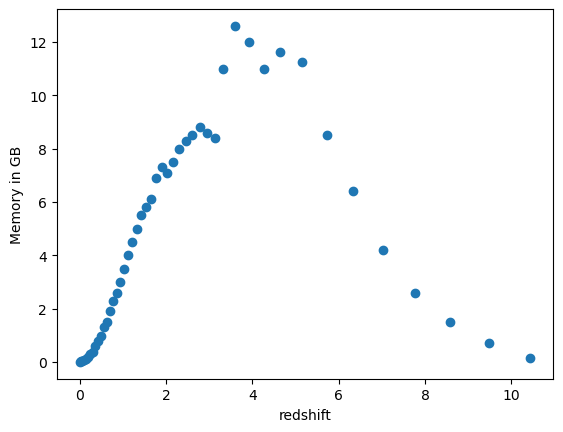

In [49]:
import matplotlib.pyplot as plt
plt.scatter(redshift_array,Memory)
plt.xlabel('redshift')
plt.ylabel('Memory in GB')